Epoch 1 - Train Acc: 81.27%, Test Acc: 85.14%
Epoch 2 - Train Acc: 86.57%, Test Acc: 85.71%
Epoch 3 - Train Acc: 87.94%, Test Acc: 86.96%
Epoch 4 - Train Acc: 88.49%, Test Acc: 85.89%
Epoch 5 - Train Acc: 89.22%, Test Acc: 87.03%
Epoch 6 - Train Acc: 89.80%, Test Acc: 87.91%
Epoch 7 - Train Acc: 90.21%, Test Acc: 88.28%
Epoch 8 - Train Acc: 90.73%, Test Acc: 88.53%
Epoch 9 - Train Acc: 91.02%, Test Acc: 88.83%
Epoch 10 - Train Acc: 91.41%, Test Acc: 89.05%
Epoch 1 - Train Acc: 86.10%, Test Acc: 88.00%
Epoch 2 - Train Acc: 91.22%, Test Acc: 90.47%
Epoch 3 - Train Acc: 93.07%, Test Acc: 91.40%
Epoch 4 - Train Acc: 94.56%, Test Acc: 91.16%
Epoch 5 - Train Acc: 95.82%, Test Acc: 91.74%
Epoch 6 - Train Acc: 96.95%, Test Acc: 91.61%
Epoch 7 - Train Acc: 97.70%, Test Acc: 92.04%
Epoch 8 - Train Acc: 98.35%, Test Acc: 92.21%
Epoch 9 - Train Acc: 98.81%, Test Acc: 91.59%
Epoch 10 - Train Acc: 99.09%, Test Acc: 91.83%


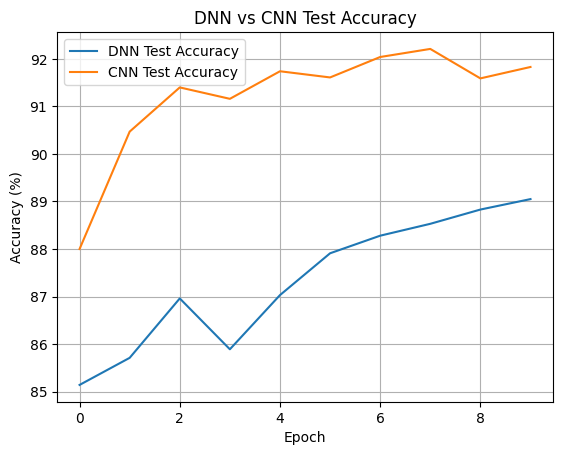

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 하이퍼파라미터
BATCH_SIZE = 64
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터 전처리 및 로딩
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

# DNN 모델 정의
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# CNN 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 28x28 -> 28x28
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 28x28 -> 28x28
        self.pool = nn.MaxPool2d(2, 2)  # 28x28 -> 14x14
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))    # (B, 32, 28, 28)
        x = self.pool(self.relu(self.conv2(x)))  # (B, 64, 14, 14)
        x = x.view(x.size(0), -1)  # (B, 64*14*14)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# 학습 및 평가 함수
def train_model(model, trainloader, testloader, epochs, lr):
    model.to(DEVICE)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_acc, test_acc = [], []

    for epoch in range(epochs):
        model.train()
        correct, total = 0, 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            correct += predicted.eq(labels).sum().item()
            total += labels.size(0)

        train_acc.append(100. * correct / total)

        # 테스트 정확도
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(DEVICE), labels.to(DEVICE)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                correct += predicted.eq(labels).sum().item()
                total += labels.size(0)

        test_acc.append(100. * correct / total)
        print(f"Epoch {epoch+1} - Train Acc: {train_acc[-1]:.2f}%, Test Acc: {test_acc[-1]:.2f}%")

    return train_acc, test_acc

# DNN 실험
dnn = DNN()
dnn_train_acc, dnn_test_acc = train_model(dnn, trainloader, testloader, EPOCHS, LEARNING_RATE)

# CNN 실험
cnn = CNN()
cnn_train_acc, cnn_test_acc = train_model(cnn, trainloader, testloader, EPOCHS, LEARNING_RATE)

# 시각화
plt.plot(dnn_test_acc, label='DNN Test Accuracy')
plt.plot(cnn_test_acc, label='CNN Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('DNN vs CNN Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
from torchsummary import summary

# CNN 또는 DNN 모델 인스턴스 생성 후 DEVICE로 이동
cnn = CNN().to(DEVICE)
summary(cnn, input_size=(1, 28, 28))

dnn = DNN().to(DEVICE)
summary(dnn, input_size=(1, 28, 28))  # 또는 input_size=(784,)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
            Conv2d-3           [-1, 64, 28, 28]          18,496
              ReLU-4           [-1, 64, 28, 28]               0
         MaxPool2d-5           [-1, 64, 14, 14]               0
            Linear-6                  [-1, 128]       1,605,760
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 1,625,866
Trainable params: 1,625,866
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.25
Params size (MB): 6.20
Estimated Total Size (MB): 7.45
----------------------------------------------------------------
--------------------------------------

In [9]:
def print_model_structure(model):
    print("CNN 모델 구조 요약:\n")
    for name, layer in model.named_children():
        print(f"{name}: {layer}")

cnn = CNN()
print_model_structure(cnn)

def print_model_structure(model):
    print("\nDNN 모델 구조 요약:\n")
    for name, layer in model.named_children():
        print(f"{name}: {layer}")

dnn = DNN()
print_model_structure(dnn)

CNN 모델 구조 요약:

conv1: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
conv2: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
pool: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
fc1: Linear(in_features=12544, out_features=128, bias=True)
fc2: Linear(in_features=128, out_features=10, bias=True)
relu: ReLU()

DNN 모델 구조 요약:

fc1: Linear(in_features=784, out_features=256, bias=True)
fc2: Linear(in_features=256, out_features=128, bias=True)
fc3: Linear(in_features=128, out_features=10, bias=True)
relu: ReLU()


##### 분석
- CNN이 시각적인 정보를 잘 캡처하기 때문에 복잡한 이미지 분류에 더 유리
- DNN은 flatten된 정보만 처리해 성능이 상대적으로 낮음

##### 개선 아이디어
- Dropout, BatchNorm 추가 실험
- CNN 구조 더 깊게 쌓기
- 데이터 증강(Augmentation)